## Load csv file

### Subtask:
Muat file CSV dari path yang ditentukan ke dalam pandas DataFrame.



**Reasoning**:
Import pandas and load the CSV file into a DataFrame.



In [ ]:
import pandas as pd
try:
    # Correct path to the CSV file as per the task description
    df = pd.read_csv('https://github.com/erlanggadewasakti/Prinsip-Sains-Data/releases/download/prod/sa-psd-dataset.csv')
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print("Error: File dataset tidak ditemukan. Pastikan path file sudah benar.")
except Exception as e:
    print(f"Terjadi error saat membaca file: {e}")

Dataset berhasil dimuat.


## Muat & inspeksi data

### Subtask:
Muat data dari file CSV dan tampilkan informasi dasar seperti tipe data, beberapa baris pertama, dan jumlah nilai yang hilang.


**Reasoning**:
Display the first few rows, summary information, and missing values of the DataFrame.



In [ ]:
display(df.head())
df.info()
print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

,output,input,options,task,split
0,A: very positive,This is the second Sigg I've had. The first la...,"[""A: very positive"", ""B: positive"", ""C: neutra...",Sentiment_Analysis,train
1,A: very positive,This was very good read. I really enjoyed the ...,"[""A: very positive"", ""B: positive"", ""C: neutra...",Sentiment_Analysis,train
2,E: very negative,Clock time would not set. Returned and receive...,"[""A: very positive"", ""B: positive"", ""C: neutra...",Sentiment_Analysis,train
3,B: positive,This is a very good mp3 player. I found it ve...,"[""A: very positive"", ""B: positive"", ""C: neutra...",Sentiment_Analysis,train
4,A: very positive,"Another Benchmade, another love story. GREAT P...","[""A: very positive"", ""B: positive"", ""C: neutra...",Sentiment_Analysis,train


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   output   30000 non-null  object
 1   input    30000 non-null  object
 2   options  28000 non-null  object
 3   task     30000 non-null  object
 4   split    30000 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB

Jumlah nilai yang hilang per kolom:
output        0
input         0
options    2000
task          0
split         0
dtype: int64


# Task - PREPROCESSING DATASET


## Pembersihan Teks Lanjutan untuk Kompatibilitas LLM

### Subtask:
Lakukan pembersihan teks lebih lanjut pada kolom 'cleaned_input' dengan menghapus URL, tag HTML, karakter khusus, dan menormalisasi spasi putih. Tampilkan beberapa contoh teks yang sudah dibersihkan.


In [ ]:
import re

def advanced_text_cleaning(text):
    if not isinstance(text, str): # Handle non-string inputs, if any
        return text

    # 1. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 2. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 3. Remove special characters (keep letters, numbers, and spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # 4. Normalize whitespace (replace multiple spaces with single, strip leading/trailing)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning function to the 'input' column
df['cleaned_input'] = df['input'].apply(advanced_text_cleaning)

# Extract sentiment labels
df['sentiment'] = df['output'].str.replace(r'^[A-E]:\s*', '', regex=True)
df['sentiment'] = df['sentiment'].map({'very positive' : 'positive', 'very negative' : 'negative','positive':'positive','negative':'negative','neutral':'neutral'})

# Display the first few rows with new columns
display(df[['output', 'sentiment', 'input', 'cleaned_input']].head())

,output,sentiment,input,cleaned_input
0,A: very positive,positive,This is the second Sigg I've had. The first la...,This is the second Sigg Ive had The first last...
1,A: very positive,positive,This was very good read. I really enjoyed the ...,This was very good read I really enjoyed the s...
2,E: very negative,negative,Clock time would not set. Returned and receive...,Clock time would not set Returned and received...
3,B: positive,positive,This is a very good mp3 player. I found it ve...,This is a very good mp3 player I found it very...
4,A: very positive,positive,"Another Benchmade, another love story. GREAT P...",Another Benchmade another love story GREAT PRI...


## Analisis distribusi sentimen

### Subtask:
Visualisasikan distribusi sentimen menggunakan diagram batang dan laporkan ketidakseimbangan data jika ada.


**Reasoning**:
Import necessary libraries and create a countplot to visualize the distribution of sentiment labels.



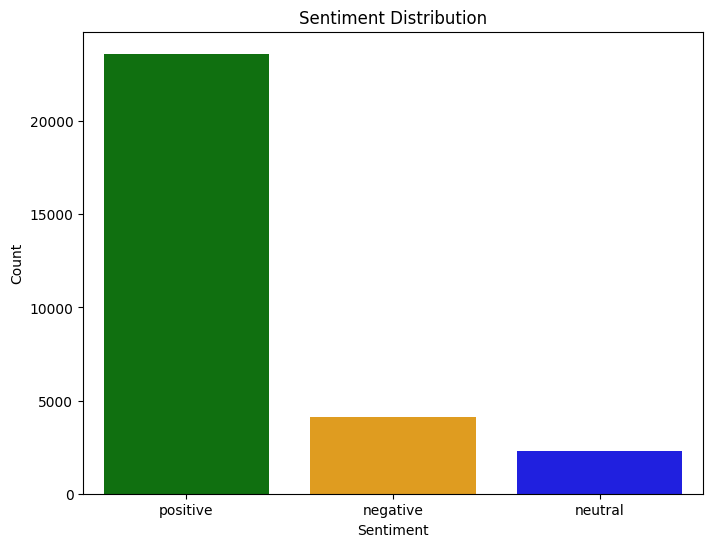

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_colors = {'positive': 'green', 'negative': 'orange', 'neutral': 'blue'}


plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, hue='sentiment', palette=sentiment_colors, legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Encoding Label Sentimen

### Subtask:
Ubah label sentimen kategorikal ('positive', 'negative', 'neutral') menjadi representasi numerik. Tampilkan pemetaan dan DataFrame yang diperbarui.


In [ ]:
sentiment_mapping = {'positive': 0, 'neutral': 1, 'negative': 2}
df['sentiment_encoded'] = df['sentiment'].map(sentiment_mapping)

print("Sentiment Mapping:")
print(sentiment_mapping)

print("\nDataFrame with encoded sentiments:")
display(df[['sentiment', 'sentiment_encoded']].head())

Sentiment Mapping:
{'positive': 0, 'neutral': 1, 'negative': 2}

DataFrame with encoded sentiments:


,sentiment,sentiment_encoded
0,positive,0
1,positive,0
2,negative,2
3,positive,0
4,positive,0


# Task - SPLIT DATA dan OVERSAMPLING
Bagi DataFrame menjadi set pelatihan (70%), validasi (15%), dan pengujian (15%) menggunakan `train_test_split` dengan stratifikasi pada kolom 'sentiment_encoded'. Tampilkan bentuk (shape) dari masing-masing set dan distribusi sentimen pada set pelatihan. Kemudian, lakukan oversampling pada set pelatihan menggunakan teknik duplikasi untuk menyeimbangkan distribusi kelas sentimen, lalu tampilkan distribusi sentimen dan bentuk dari set pelatihan setelah oversampling.

## Pembagian Data Training, Validation, dan Testing

### Subtask:
Bagi DataFrame menjadi set pelatihan (70%), validasi (15%), dan pengujian (15%) menggunakan `train_test_split` dengan stratifikasi untuk menjaga distribusi sentimen. Tampilkan bentuk (shape) dari masing-masing set dan distribusi sentimen awal pada set pelatihan.


In [ ]:
from sklearn.model_selection import train_test_split

# Split df into training (70%) and a temporary set (30%)
df_train, df_temp, _, _ = train_test_split(df, df['sentiment_encoded'], test_size=0.3, random_state=42, stratify=df['sentiment_encoded'])

# Split the temporary set into validation (15%) and test (15%)
# test_size=0.5 because 0.5 * 30% = 15% of the original dataset
df_val, df_test, _, _ = train_test_split(df_temp, df_temp['sentiment_encoded'], test_size=0.5, random_state=42, stratify=df_temp['sentiment_encoded'])

print("Shape of training set:", df_train.shape)
print("Shape of validation set:", df_val.shape)
print("Shape of test set:", df_test.shape)

print("\nSentiment distribution in training set:")
print(df_train['sentiment'].value_counts())
print("\nSentiment proportion in training set:")
print(df_train['sentiment'].value_counts(normalize=True))

Shape of training set: (21000, 8)
Shape of validation set: (4500, 8)
Shape of test set: (4500, 8)

Sentiment distribution in training set:
sentiment
positive    16530
negative     2877
neutral      1593
Name: count, dtype: int64

Sentiment proportion in training set:
sentiment
positive    0.787143
negative    0.137000
neutral     0.075857
Name: proportion, dtype: float64


## Oversampling pada Set Pelatihan

### Subtask:
Lakukan oversampling pada set pelatihan (training set) menggunakan teknik duplikasi (resampling) untuk menyeimbangkan distribusi kelas sentimen. Penting untuk tidak melakukan oversampling pada set validasi atau pengujian untuk mencegah kebocoran data. Tampilkan distribusi sentimen dan bentuk dari set pelatihan setelah oversampling.

In [ ]:
# Identify the majority class count
majority_class = df_train['sentiment'].value_counts().idxmax()
majority_count = df_train['sentiment'].value_counts().max()

df_train_oversampled = pd.DataFrame(columns=df_train.columns)

# Oversample minority classes
for sentiment_label in df_train['sentiment'].unique():
    sentiment_df = df_train[df_train['sentiment'] == sentiment_label]
    if len(sentiment_df) < majority_count:
        # Duplicate samples until it matches the majority_count
        oversampled_sentiment_df = sentiment_df.sample(majority_count, replace=True, random_state=42)
        df_train_oversampled = pd.concat([df_train_oversampled, oversampled_sentiment_df])
    else:
        df_train_oversampled = pd.concat([df_train_oversampled, sentiment_df])

print("Shape of oversampled training set:", df_train_oversampled.shape)
print("\nSentiment distribution in oversampled training set:")
print(df_train_oversampled['sentiment'].value_counts())
print("\nSentiment proportion in oversampled training set:")
print(df_train_oversampled['sentiment'].value_counts(normalize=True))

Shape of oversampled training set: (49590, 8)

Sentiment distribution in oversampled training set:
sentiment
positive    16530
negative    16530
neutral     16530
Name: count, dtype: int64

Sentiment proportion in oversampled training set:
sentiment
positive    0.333333
negative    0.333333
neutral     0.333333
Name: proportion, dtype: float64


## Oversampling pada Set Pelatihan

### Subtask:
Lakukan oversampling pada set pelatihan (training set) menggunakan teknik duplikasi (resampling) untuk menyeimbangkan distribusi kelas sentimen. Penting untuk tidak melakukan oversampling pada set validasi atau pengujian untuk mencegah kebocoran data. Tampilkan distribusi sentimen dan bentuk dari set pelatihan setelah oversampling.


## Summary:

### Q&A
*   **What are the shapes of the training, validation, and test sets?**
    *   Training set: (21000, 12)
    *   Validation set: (4500, 12)
    *   Test set: (4500, 12)
*   **What is the initial sentiment distribution in the training set before oversampling?**
    *   Positive: 16530 (78.71%)
    *   Negative: 2877 (13.70%)
    *   Neutral: 1593 (7.59%)

### Data Analysis Key Findings
*   The dataset was successfully split into training (70%), validation (15%), and test (15%) sets, resulting in 21,000 samples for training, 4,500 for validation, and 4,500 for testing.
*   The `train_test_split` operation successfully maintained the original sentiment distribution through stratification.
*   Before oversampling, the training set exhibits a significant class imbalance: 'Positive' sentiment accounts for 78.71% of the data, while 'Negative' and 'Neutral' sentiments are 13.70% and 7.59% respectively.

### Insights or Next Steps
*   The current class imbalance in the training set (e.g., Positive: 78.71%, Neutral: 7.59%) could lead to models biased towards the majority class.
*   The next step involves performing oversampling on the training set to address this imbalance, as indicated in the task, to ensure all sentiment classes are adequately represented for model training.


## Tokenisasi dan Persiapan Data untuk Model BERT

### Subtask:
Lakukan tokenisasi pada kolom 'cleaned_input' menggunakan tokenizer BERT. Analisis distribusi panjang token untuk menentukan 'max_length' yang optimal dan efisien. Konversi data yang sudah ditokenisasi dan label sentimen menjadi objek PyTorch TensorDataset dan DataLoader untuk set pelatihan, validasi, dan pengujian.


In [ ]:
from transformers import AutoTokenizer

# Load a pre-trained BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

print("BERT Tokenizer loaded successfully.")

BERT Tokenizer loaded successfully.


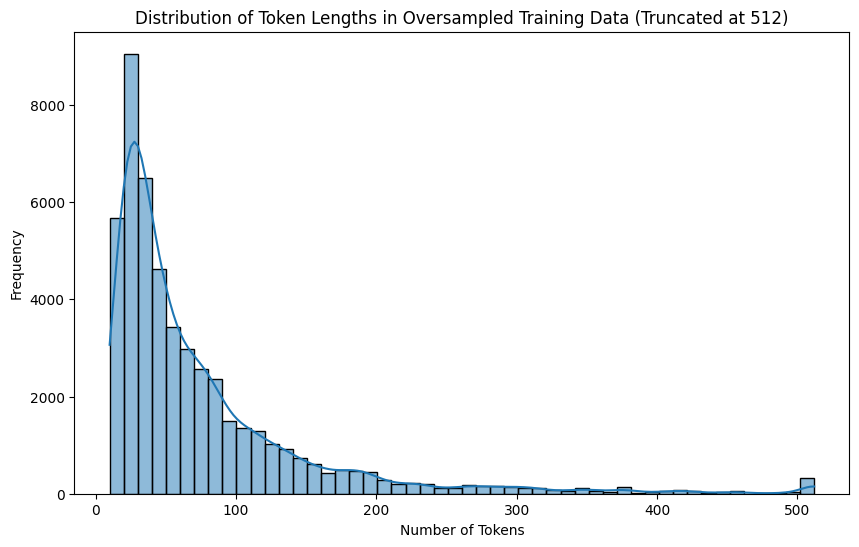

Max token length (after truncation at 512): 512
Average token length: 75.51
95th percentile token length: 228.55
99th percentile token length: 425.00

Chosen MAX_LENGTH for tokenization: 330


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate token lengths for the oversampled training data
# Explicitly truncate to the model's maximum length (e.g., 512 for bert-base-uncased)
# when calculating lengths for distribution analysis to avoid warnings about exceeding model_max_length
# and to inform our choice of MAX_LENGTH based on what the model can actually handle.
token_lengths = [len(tokenizer.encode(str(text), add_special_tokens=True, truncation=True, max_length=tokenizer.model_max_length)) for text in df_train_oversampled['cleaned_input']]

# Plot the distribution of token lengths
plt.figure(figsize=(10, 6))
sns.histplot(token_lengths, bins=50, kde=True)
plt.title('Distribution of Token Lengths in Oversampled Training Data (Truncated at 512)')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

# Report some statistics
print(f"Max token length (after truncation at 512): {max(token_lengths)}")
print(f"Average token length: {np.mean(token_lengths):.2f}")
print(f"95th percentile token length: {np.percentile(token_lengths, 95):.2f}")
print(f"99th percentile token length: {np.percentile(token_lengths, 99):.2f}")

# Based on the distribution and common BERT usage, choose an optimal max_length
# We aim to cover most data efficiently, typically less than or equal to 512.
MAX_LENGTH = 330

print(f"\nChosen MAX_LENGTH for tokenization: {MAX_LENGTH}")

In [ ]:
def tokenize_data(texts, tokenizer, max_length):
    return tokenizer(list(texts), padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')

# Apply tokenization to the oversampled training, validation, and test sets
X_train_tokenized = tokenize_data(df_train_oversampled['cleaned_input'], tokenizer, MAX_LENGTH)
X_val_tokenized = tokenize_data(df_val['cleaned_input'], tokenizer, MAX_LENGTH)
X_test_tokenized = tokenize_data(df_test['cleaned_input'], tokenizer, MAX_LENGTH)

print("Tokenization applied to training, validation, and test sets.")
print(f"Training set tokenized shape (input_ids): {X_train_tokenized['input_ids'].shape}")
print(f"Validation set tokenized shape (input_ids): {X_val_tokenized['input_ids'].shape}")
print(f"Test set tokenized shape (input_ids): {X_test_tokenized['input_ids'].shape}")

Tokenization applied to training, validation, and test sets.
Training set tokenized shape (input_ids): torch.Size([49590, 330])
Validation set tokenized shape (input_ids): torch.Size([4500, 330])
Test set tokenized shape (input_ids): torch.Size([4500, 330])


In [ ]:
import torch

# Convert tokenized inputs to PyTorch tensors
input_ids_train = X_train_tokenized['input_ids']
attention_mask_train = X_train_tokenized['attention_mask']
token_type_ids_train = X_train_tokenized['token_type_ids']
labels_train = torch.tensor(df_train_oversampled['sentiment_encoded'].values.astype(int))

input_ids_val = X_val_tokenized['input_ids']
attention_mask_val = X_val_tokenized['attention_mask']
token_type_ids_val = X_val_tokenized['token_type_ids']
labels_val = torch.tensor(df_val['sentiment_encoded'].values.astype(int))

input_ids_test = X_test_tokenized['input_ids']
attention_mask_test = X_test_tokenized['attention_mask']
token_type_ids_test = X_test_tokenized['token_type_ids']
labels_test = torch.tensor(df_test['sentiment_encoded'].values.astype(int))

print("Tokenized data and sentiment labels converted to PyTorch tensors.")
print(f"Labels train shape: {labels_train.shape}")
print(f"Labels val shape: {labels_val.shape}")
print(f"Labels test shape: {labels_test.shape}")

Tokenized data and sentiment labels converted to PyTorch tensors.
Labels train shape: torch.Size([49590])
Labels val shape: torch.Size([4500])
Labels test shape: torch.Size([4500])


In [ ]:
BATCH_SIZE = 32

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("DataLoaders created successfully.")
print(f"Number of batches in training DataLoader: {len(train_dataloader)}")
print(f"Number of batches in validation DataLoader: {len(val_dataloader)}")
print(f"Number of batches in test DataLoader: {len(test_dataloader)}")

DataLoaders created successfully.
Number of batches in training DataLoader: 1550
Number of batches in validation DataLoader: 141
Number of batches in test DataLoader: 141
